In [11]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from scipy import stats

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

# sns.set_palette("coolwarm", 3)
# sns.set_palette(sns.diverging_palette(10, 220, sep=80, n=8))

sns.set_context('talk')

In [2]:
# import data
evict = pd.read_csv('../data/eviction_lab/csv/block-groups.csv')

In [3]:
evict.year.value_counts()

2015    450
2009    450
2004    450
2008    450
2012    450
2016    450
2001    450
2005    450
2013    450
2011    450
2002    450
2006    450
2010    450
2014    450
2003    450
2007    450
2000    450
Name: year, dtype: int64

In [4]:
active_years = [2016, 2012, 2011, 2010, 2009, 2008, 2007, 2006]

In [5]:
#test
evict['eviction-rate'].loc[evict['year'] == 2000].sample(10)

6511   NaN
3400   NaN
221    NaN
3179   NaN
5287   NaN
3910   NaN
1190   NaN
6018   NaN
2023   NaN
6392   NaN
Name: eviction-rate, dtype: float64

In [6]:
for year in active_years:
    print(f'{year} mean:', float(str(round(evict['eviction-rate'].loc[evict['year'] == year].mean(),2))))
print('\n')
for year in active_years:
    print(f'{year} std:', float(str(round(evict['eviction-rate'].loc[evict['year'] == year].std(),2))))
    

2016 mean: 2.57
2012 mean: 0.92
2011 mean: 0.91
2010 mean: 1.0
2009 mean: 1.02
2008 mean: 0.97
2007 mean: 0.68
2006 mean: 0.92


2016 std: 3.28
2012 std: 1.45
2011 std: 1.36
2010 std: 1.57
2009 std: 1.45
2008 std: 1.34
2007 std: 0.94
2006 std: 1.39


null hypothesis of t-test is that 2 independent samples have identical average (expected) values

p < alpha => reject the null hypothesis

In [7]:
stats.ttest_ind(evict['eviction-rate'].loc[evict['year'] == 2016], 
               evict['eviction-rate'].loc[evict['year'] == 2012], equal_var=False)

Ttest_indResult(statistic=9.748796966485191, pvalue=5.5124926579577216e-21)

In [8]:
stats.f_oneway(evict['eviction-rate'].loc[evict['year'] == 2016], 
               evict['eviction-rate'].loc[evict['year'] == 2012],
               evict['eviction-rate'].loc[evict['year'] == 2011],
               evict['eviction-rate'].loc[evict['year'] == 2010],
               evict['eviction-rate'].loc[evict['year'] == 2009],
               evict['eviction-rate'].loc[evict['year'] == 2008],
               evict['eviction-rate'].loc[evict['year'] == 2007],
               evict['eviction-rate'].loc[evict['year'] == 2006])

F_onewayResult(statistic=53.34968222285293, pvalue=8.074241633277001e-73)

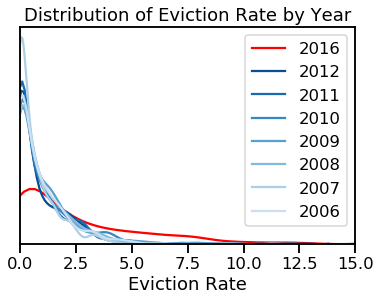

In [23]:
sns.set_palette(sns.color_palette("Blues_r", 8,))

ax = sns.kdeplot(evict['eviction-rate'].loc[evict['year'] == 2016], color='red');
sns.kdeplot(evict['eviction-rate'].loc[evict['year'] == 2012]);
sns.kdeplot(evict['eviction-rate'].loc[evict['year'] == 2011]);
sns.kdeplot(evict['eviction-rate'].loc[evict['year'] == 2010]);
sns.kdeplot(evict['eviction-rate'].loc[evict['year'] == 2009]);
sns.kdeplot(evict['eviction-rate'].loc[evict['year'] == 2008]);
sns.kdeplot(evict['eviction-rate'].loc[evict['year'] == 2007]);
sns.kdeplot(evict['eviction-rate'].loc[evict['year'] == 2006]);
ax.set(xlim=(0, 15));
plt.legend(labels = [2016, 2012, 2011, 2010, 2009, 2008, 2007, 2006]);
plt.title('Distribution of Eviction Rate by Year');
ax.yaxis.set_visible(False);
ax.set_xlabel('Eviction Rate');
plt.show();

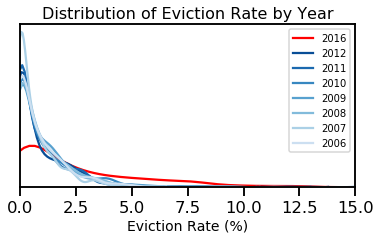

In [41]:
sns.set_palette(sns.color_palette("Blues_r", 8,))
plt.figure(figsize=(6,3))
ax = sns.kdeplot(evict['eviction-rate'].loc[evict['year'] == 2016], color='red');
sns.kdeplot(evict['eviction-rate'].loc[evict['year'] == 2012]);
sns.kdeplot(evict['eviction-rate'].loc[evict['year'] == 2011]);
sns.kdeplot(evict['eviction-rate'].loc[evict['year'] == 2010]);
sns.kdeplot(evict['eviction-rate'].loc[evict['year'] == 2009]);
sns.kdeplot(evict['eviction-rate'].loc[evict['year'] == 2008]);
sns.kdeplot(evict['eviction-rate'].loc[evict['year'] == 2007]);
sns.kdeplot(evict['eviction-rate'].loc[evict['year'] == 2006]);
ax.set(xlim=(0, 15));
plt.legend(labels = [2016, 2012, 2011, 2010, 2009, 2008, 2007, 2006], prop={'size': 10});
plt.title('Distribution of Eviction Rate by Year', size=16);
ax.yaxis.set_visible(False);
ax.set_xlabel('Eviction Rate (%)', size=14);
plt.show();